In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
import h5py
%matplotlib inline

In [4]:
# 자신이 설정하는 파라미터

# 배치사이즈
batch_size = 2000

# 에포크수
epochs = 100

In [5]:
# 데이터 추출
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# one-hot-label에 변환
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples


In [6]:
# 모델의 구축
model = Sequential()

# 첫번째 히든 레이어(입력784 -> 출력256)
model.add(Dense(256, activation="relu",input_shape=(784,)))
model.add(Dropout(0.1))

# 두번째 히든 레이어(256 -> 출력128)
## 히든레이어는 아래의 두행을 복사->붙여넣기하는 것으로 추가할 수 있습니다.
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

# 3번째 히든 레이어(128 -> 출력32)
## 隠れ層は以下の2行をコピペすることで追加できます
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

# 출력 레이어力層(입력32 -> 출력10)
model.add(Dense(10, activation='softmax'))

# 모델 개요 표시
model.summary()

# 모델의 컴파일モ
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# 피팅(학습)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# 스코어의 계산과 표시
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3

30/30 [==============================] - 1s 23ms/step - loss: 0.4565 - accuracy: 0.8653 - val_loss: 0.3237 - val_accuracy: 0.9097
Epoch 50/100
30/30 [==============================] - 1s 20ms/step - loss: 0.4487 - accuracy: 0.8679 - val_loss: 0.3209 - val_accuracy: 0.9099
Epoch 51/100
30/30 [==============================] - 1s 20ms/step - loss: 0.4455 - accuracy: 0.8674 - val_loss: 0.3179 - val_accuracy: 0.9111
Epoch 52/100
30/30 [==============================] - 1s 19ms/step - loss: 0.4452 - accuracy: 0.8698 - val_loss: 0.3154 - val_accuracy: 0.9116
Epoch 53/100
30/30 [==============================] - 1s 19ms/step - loss: 0.4411 - accuracy: 0.8683 - val_loss: 0.3130 - val_accuracy: 0.9122
Epoch 54/100
30/30 [==============================] - 1s 22ms/step - loss: 0.4343 - accuracy: 0.8728 - val_loss: 0.3101 - val_accuracy: 0.9125
Epoch 55/100
30/30 [==============================] - 1s 21ms/step - loss: 0.4331 - accuracy: 0.8732 - val_loss: 0.3075 - val_accuracy: 0.9131
Epoch 56/100

In [7]:
model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.2347 - accuracy: 0.9315


[0.2346988022327423, 0.9315000176429749]

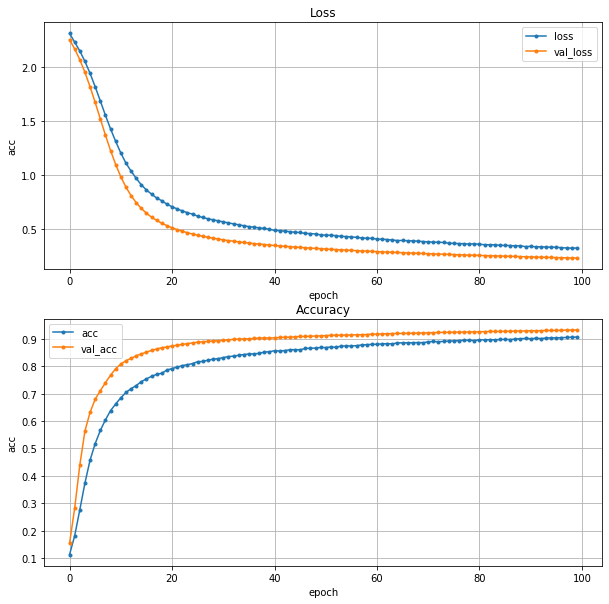

In [10]:
# 학습의 결과를 플롯
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Loss')
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()